In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Pranadh\OneDrive\Desktop\customer-churn-prediction\data\Customer_Churn_Dataset.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()


11

In [5]:
df = df.dropna()

In [6]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

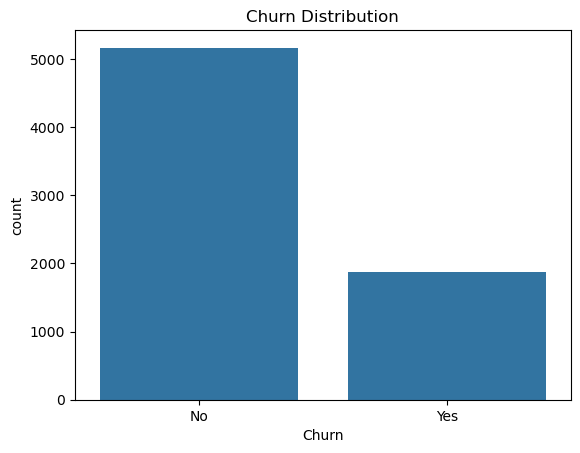

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


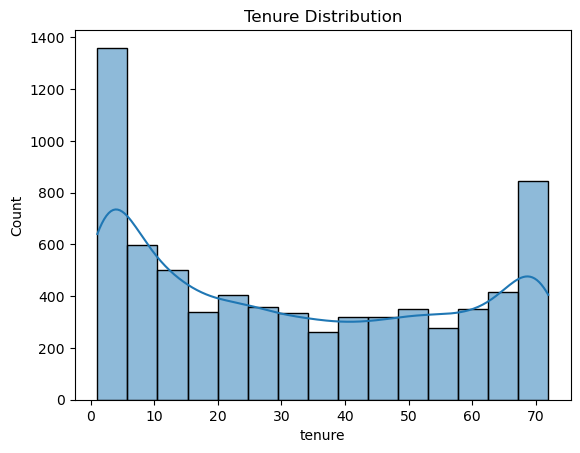

In [8]:
sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()


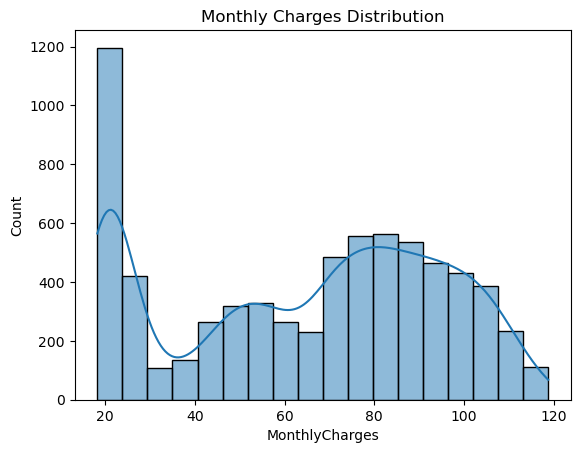

In [9]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


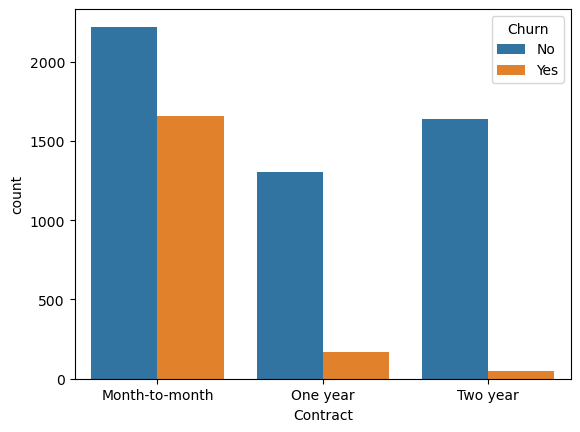

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()


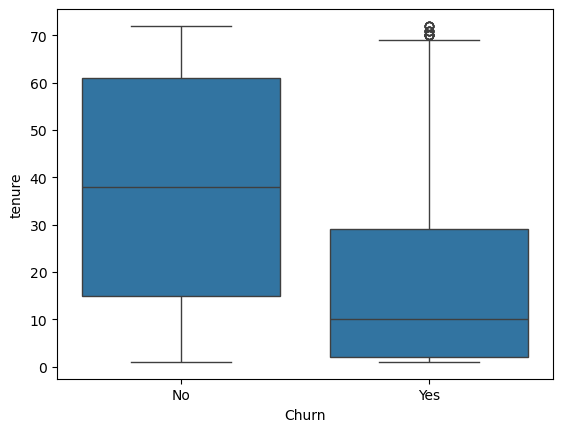

In [11]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


In [12]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})


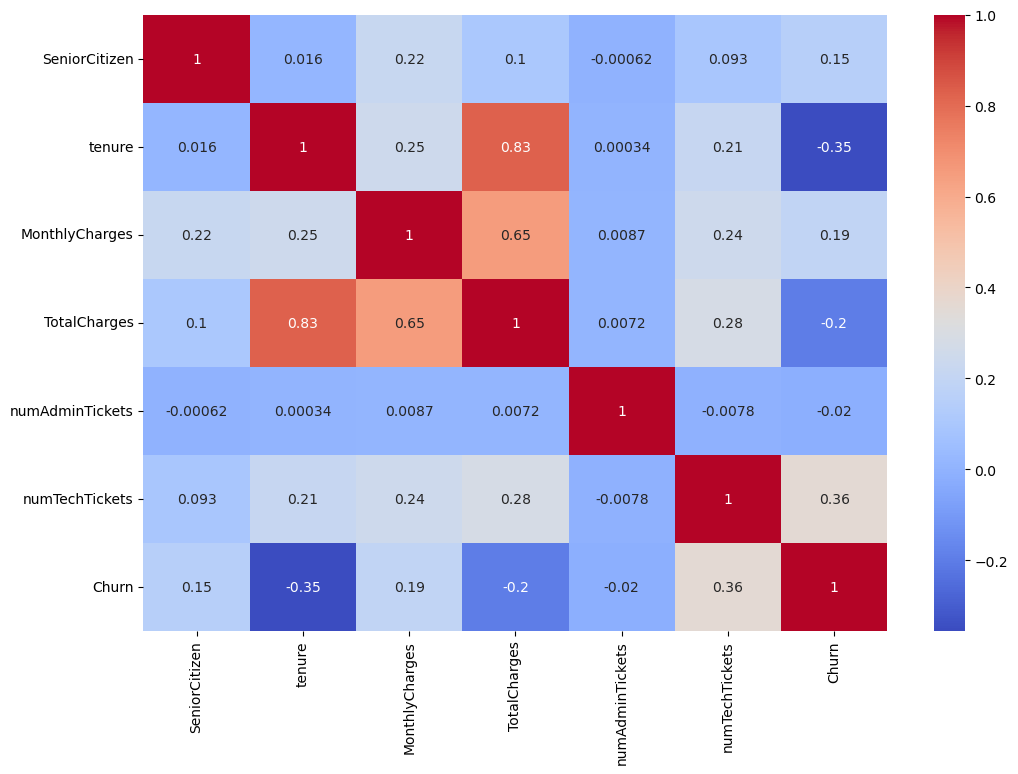

In [13]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [14]:
df=df.drop(columns=['customerID'])

In [15]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [16]:
X = pd.get_dummies(X, drop_first=True)


In [17]:
import pickle
import os

os.makedirs("../model", exist_ok=True)

pickle.dump(X.columns, open("../model/model_columns.pkl", "wb"))

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.8194740582800284

Confusion Matrix:
 [[829 204]
 [ 50 324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      1033
           1       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))




Accuracy: 0.851457000710732

Confusion Matrix:
 [[959  74]
 [135 239]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1033
           1       0.76      0.64      0.70       374

    accuracy                           0.85      1407
   macro avg       0.82      0.78      0.80      1407
weighted avg       0.85      0.85      0.85      1407



# FInding the ROC Curve


# Hyperparameter tuning (Improve RF)

In [24]:
y_prob = lr.predict_proba(X_test)[:,1]
y_pred_custom = (y_prob > 0.4).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1033
           1       0.56      0.91      0.69       374

    accuracy                           0.78      1407
   macro avg       0.76      0.83      0.76      1407
weighted avg       0.85      0.78      0.80      1407



In [25]:
y_pred_custom = (y_prob > 0.3).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1033
           1       0.52      0.94      0.67       374

    accuracy                           0.76      1407
   macro avg       0.75      0.82      0.74      1407
weighted avg       0.85      0.76      0.77      1407



In [26]:
y_pred_custom = (y_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      1033
           1       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



In [27]:
import pickle

# Save model
pickle.dump(lr, open("../model/churn_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open(r"../model/scaler.pkl", "wb"))

# Save threshold
with open(r"../model/threshold.pkl", "wb") as f:
    pickle.dump(0.4, f)

In [30]:
import pickle
threshold = pickle.load(open("C:\\Users\\Pranadh\\OneDrive\\Desktop\\customer-churn-prediction\\model\\threshold.pkl", "rb"))
print(threshold)

0.4


In [33]:
import pandas as pd
import numpy as np
import pickle

# Load model
model = pickle.load(open("C:\\Users\\Pranadh\\OneDrive\\Desktop\\customer-churn-prediction\\model\\churn_model.pkl", "rb"))

# Load feature names
columns = pickle.load(open("C:\\Users\\Pranadh\\OneDrive\\Desktop\\customer-churn-prediction\\model\\model_columns.pkl", "rb"))

# Get coefficients
coef = model.coef_[0]

importance = pd.DataFrame({
    "Feature": columns,
    "Coefficient": coef
})

# Sort by absolute impact
importance["Abs"] = np.abs(importance["Coefficient"])
importance = importance.sort_values("Abs", ascending=False)

importance

,Feature,Coefficient,Abs
5,numTechTickets,1.865896,1.865896
1,tenure,-1.415719,1.415719
27,Contract_Two year,-1.197241,1.197241
12,InternetService_Fiber optic,0.817564,0.817564
2,MonthlyCharges,-0.732042,0.732042
3,TotalCharges,-0.594152,0.594152
26,Contract_One year,-0.422456,0.422456
15,OnlineSecurity_Yes,-0.194104,0.194104
11,MultipleLines_Yes,0.182367,0.182367
17,OnlineBackup_Yes,-0.146200,0.146200
